# Data Preparation

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

In [2]:
# Load metadata and features.
tracks = pd.read_csv('data/fma_metadata/tracks.csv')
#genres = pd.read_csv('data/fma_metadata/genres.csv')
#features = pd.read_csv('data/fma_metadata/features.csv')
#echonest = pd.read_csv('data/fma_metadata/echonest.csv')

tracks.shape#, genres.shape, features.shape, echonest.shape

(106574, 53)

In [3]:
tracks.head() #Display the first 5 objects of the dataset

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [4]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   track_id                  106574 non-null  int64  
 1   album_comments            106574 non-null  int64  
 2   album_date_created        103045 non-null  object 
 3   album_date_released       70294 non-null   object 
 4   album_engineer            15295 non-null   object 
 5   album_favorites           106574 non-null  int64  
 6   album_id                  106574 non-null  int64  
 7   album_information         83149 non-null   object 
 8   album_listens             106574 non-null  int64  
 9   album_producer            18060 non-null   object 
 10  album_tags                106574 non-null  object 
 11  album_title               105549 non-null  object 
 12  album_tracks              106574 non-null  int64  
 13  album_type                100066 non-null  o

#### Distribution of the variables and statistics

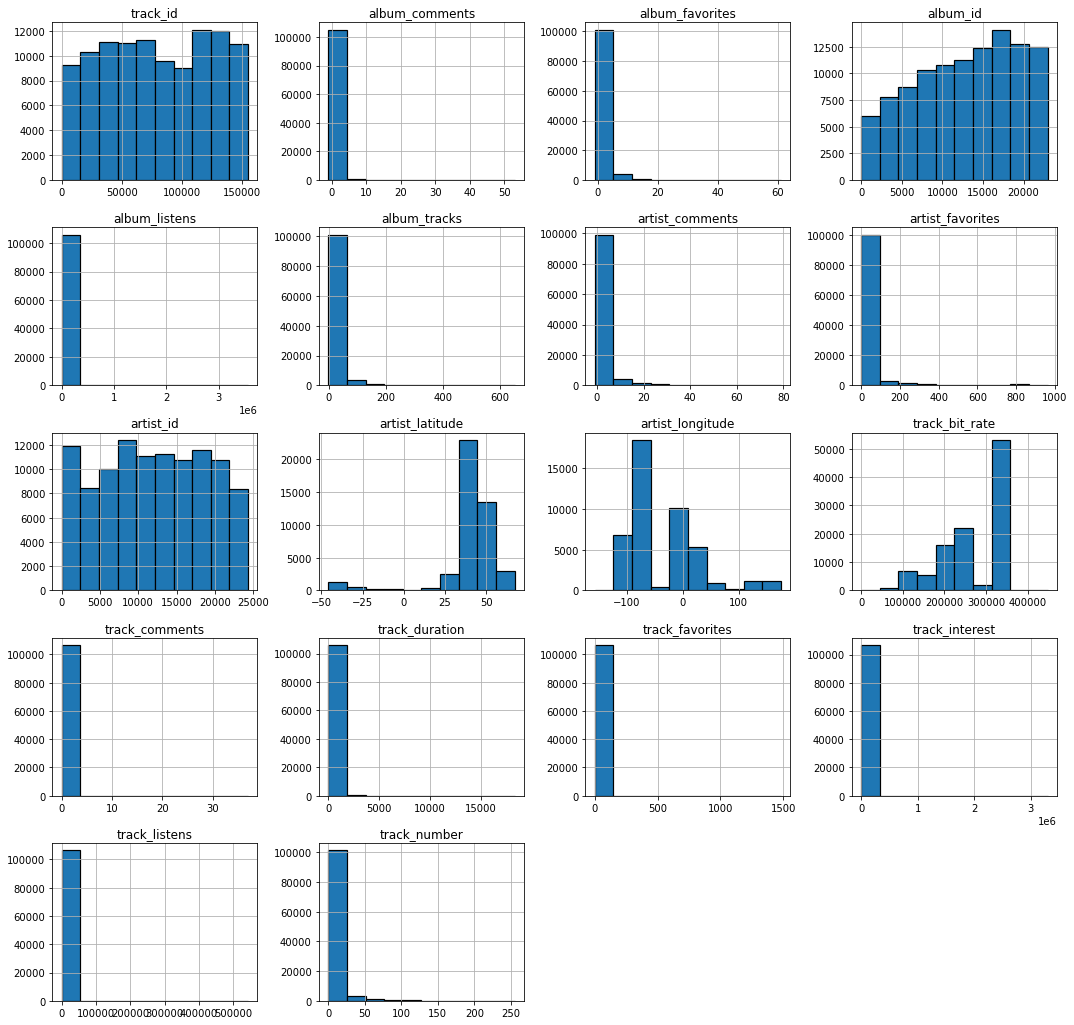

In [5]:
tracks.hist(edgecolor='black', linewidth=1.2, figsize=(18, 18)); #Display the histogram for each attribute

#### Generate descriptive statistics

In [6]:
tracks.describe()

,track_id,album_comments,album_favorites,album_id,album_listens,album_tracks,artist_comments,artist_favorites,artist_id,artist_latitude,artist_longitude,track_bit_rate,track_comments,track_duration,track_favorites,track_interest,track_listens,track_number
count,106574.000000,106574.000000,106574.000000,106574.000000,1.065740e+05,106574.000000,106574.000000,106574.000000,106574.000000,44544.000000,44544.000000,106574.000000,106574.000000,106574.000000,106574.000000,1.065740e+05,106574.000000,106574.000000
mean,79442.637435,0.394946,1.286927,12826.933914,3.212031e+04,19.721452,1.894702,30.041915,12036.770404,39.901626,-38.668642,263274.695048,0.031621,277.849100,3.182521,3.541310e+03,2329.353548,8.260945
std,44704.398384,2.268915,3.133035,6290.261805,1.478532e+05,39.943673,6.297679,100.511408,6881.420867,18.240860,65.237220,67623.443584,0.321993,305.518553,13.513820,1.901743e+04,8028.070647,15.243271
min,2.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1.000000,-45.878760,-157.526855,-1.000000,0.000000,0.000000,0.000000,2.000000e+00,0.000000,0.000000
25%,40820.250000,0.000000,0.000000,7793.000000,3.361000e+03,7.000000,0.000000,1.000000,6443.000000,39.271398,-79.997459,192000.000000,0.000000,149.000000,0.000000,5.990000e+02,292.000000,2.000000
50%,78983.500000,0.000000,0.000000,13374.000000,8.982000e+03,11.000000,0.000000,5.000000,12029.500000,41.387917,-73.554431,299914.000000,0.000000,216.000000,1.000000,1.314000e+03,764.000000,5.000000
75%,119422.750000,0.000000,1.000000,18203.000000,2.363500e+04,17.000000,1.000000,16.000000,18011.000000,48.856930,4.351710,320000.000000,0.000000,305.000000,3.000000,3.059000e+03,2018.000000,9.000000
max,155320.000000,53.000000,61.000000,22940.000000,3.564243e+06,652.000000,79.000000,963.000000,24357.000000,67.286005,175.277000,448000.000000,37.000000,18350.000000,1482.000000,3.293557e+06,543252.000000,255.000000


In [7]:
statistics_table = tracks.describe().transpose()

print(statistics_table)

                     count           mean            std         min  \
track_id          106574.0   79442.637435   44704.398384    2.000000   
album_comments    106574.0       0.394946       2.268915   -1.000000   
album_favorites   106574.0       1.286927       3.133035   -1.000000   
album_id          106574.0   12826.933914    6290.261805   -1.000000   
album_listens     106574.0   32120.306182  147853.178406   -1.000000   
album_tracks      106574.0      19.721452      39.943673   -1.000000   
artist_comments   106574.0       1.894702       6.297679   -1.000000   
artist_favorites  106574.0      30.041915     100.511408   -1.000000   
artist_id         106574.0   12036.770404    6881.420867    1.000000   
artist_latitude    44544.0      39.901626      18.240860  -45.878760   
artist_longitude   44544.0     -38.668642      65.237220 -157.526855   
track_bit_rate    106574.0  263274.695048   67623.443584   -1.000000   
track_comments    106574.0       0.031621       0.321993    0.00

In [8]:
tracks.mean() #Returns the average value for each numerical column

track_id             79442.637435
album_comments           0.394946
album_favorites          1.286927
album_id             12826.933914
album_listens        32120.306182
album_tracks            19.721452
artist_comments          1.894702
artist_favorites        30.041915
artist_id            12036.770404
artist_latitude         39.901626
artist_longitude       -38.668642
track_bit_rate      263274.695048
track_comments           0.031621
track_duration         277.849100
track_favorites          3.182521
track_interest        3541.310207
track_listens         2329.353548
track_number             8.260945
dtype: float64

In [9]:
tracks.std() #Returns the standard deviation for each numerical column

track_id             44704.398384
album_comments           2.268915
album_favorites          3.133035
album_id              6290.261805
album_listens       147853.178406
album_tracks            39.943673
artist_comments          6.297679
artist_favorites       100.511408
artist_id             6881.420867
artist_latitude         18.240860
artist_longitude        65.237220
track_bit_rate       67623.443584
track_comments           0.321993
track_duration         305.518553
track_favorites         13.513820
track_interest       19017.430891
track_listens         8028.070647
track_number            15.243271
dtype: float64

### Outliers

<AxesSubplot:>

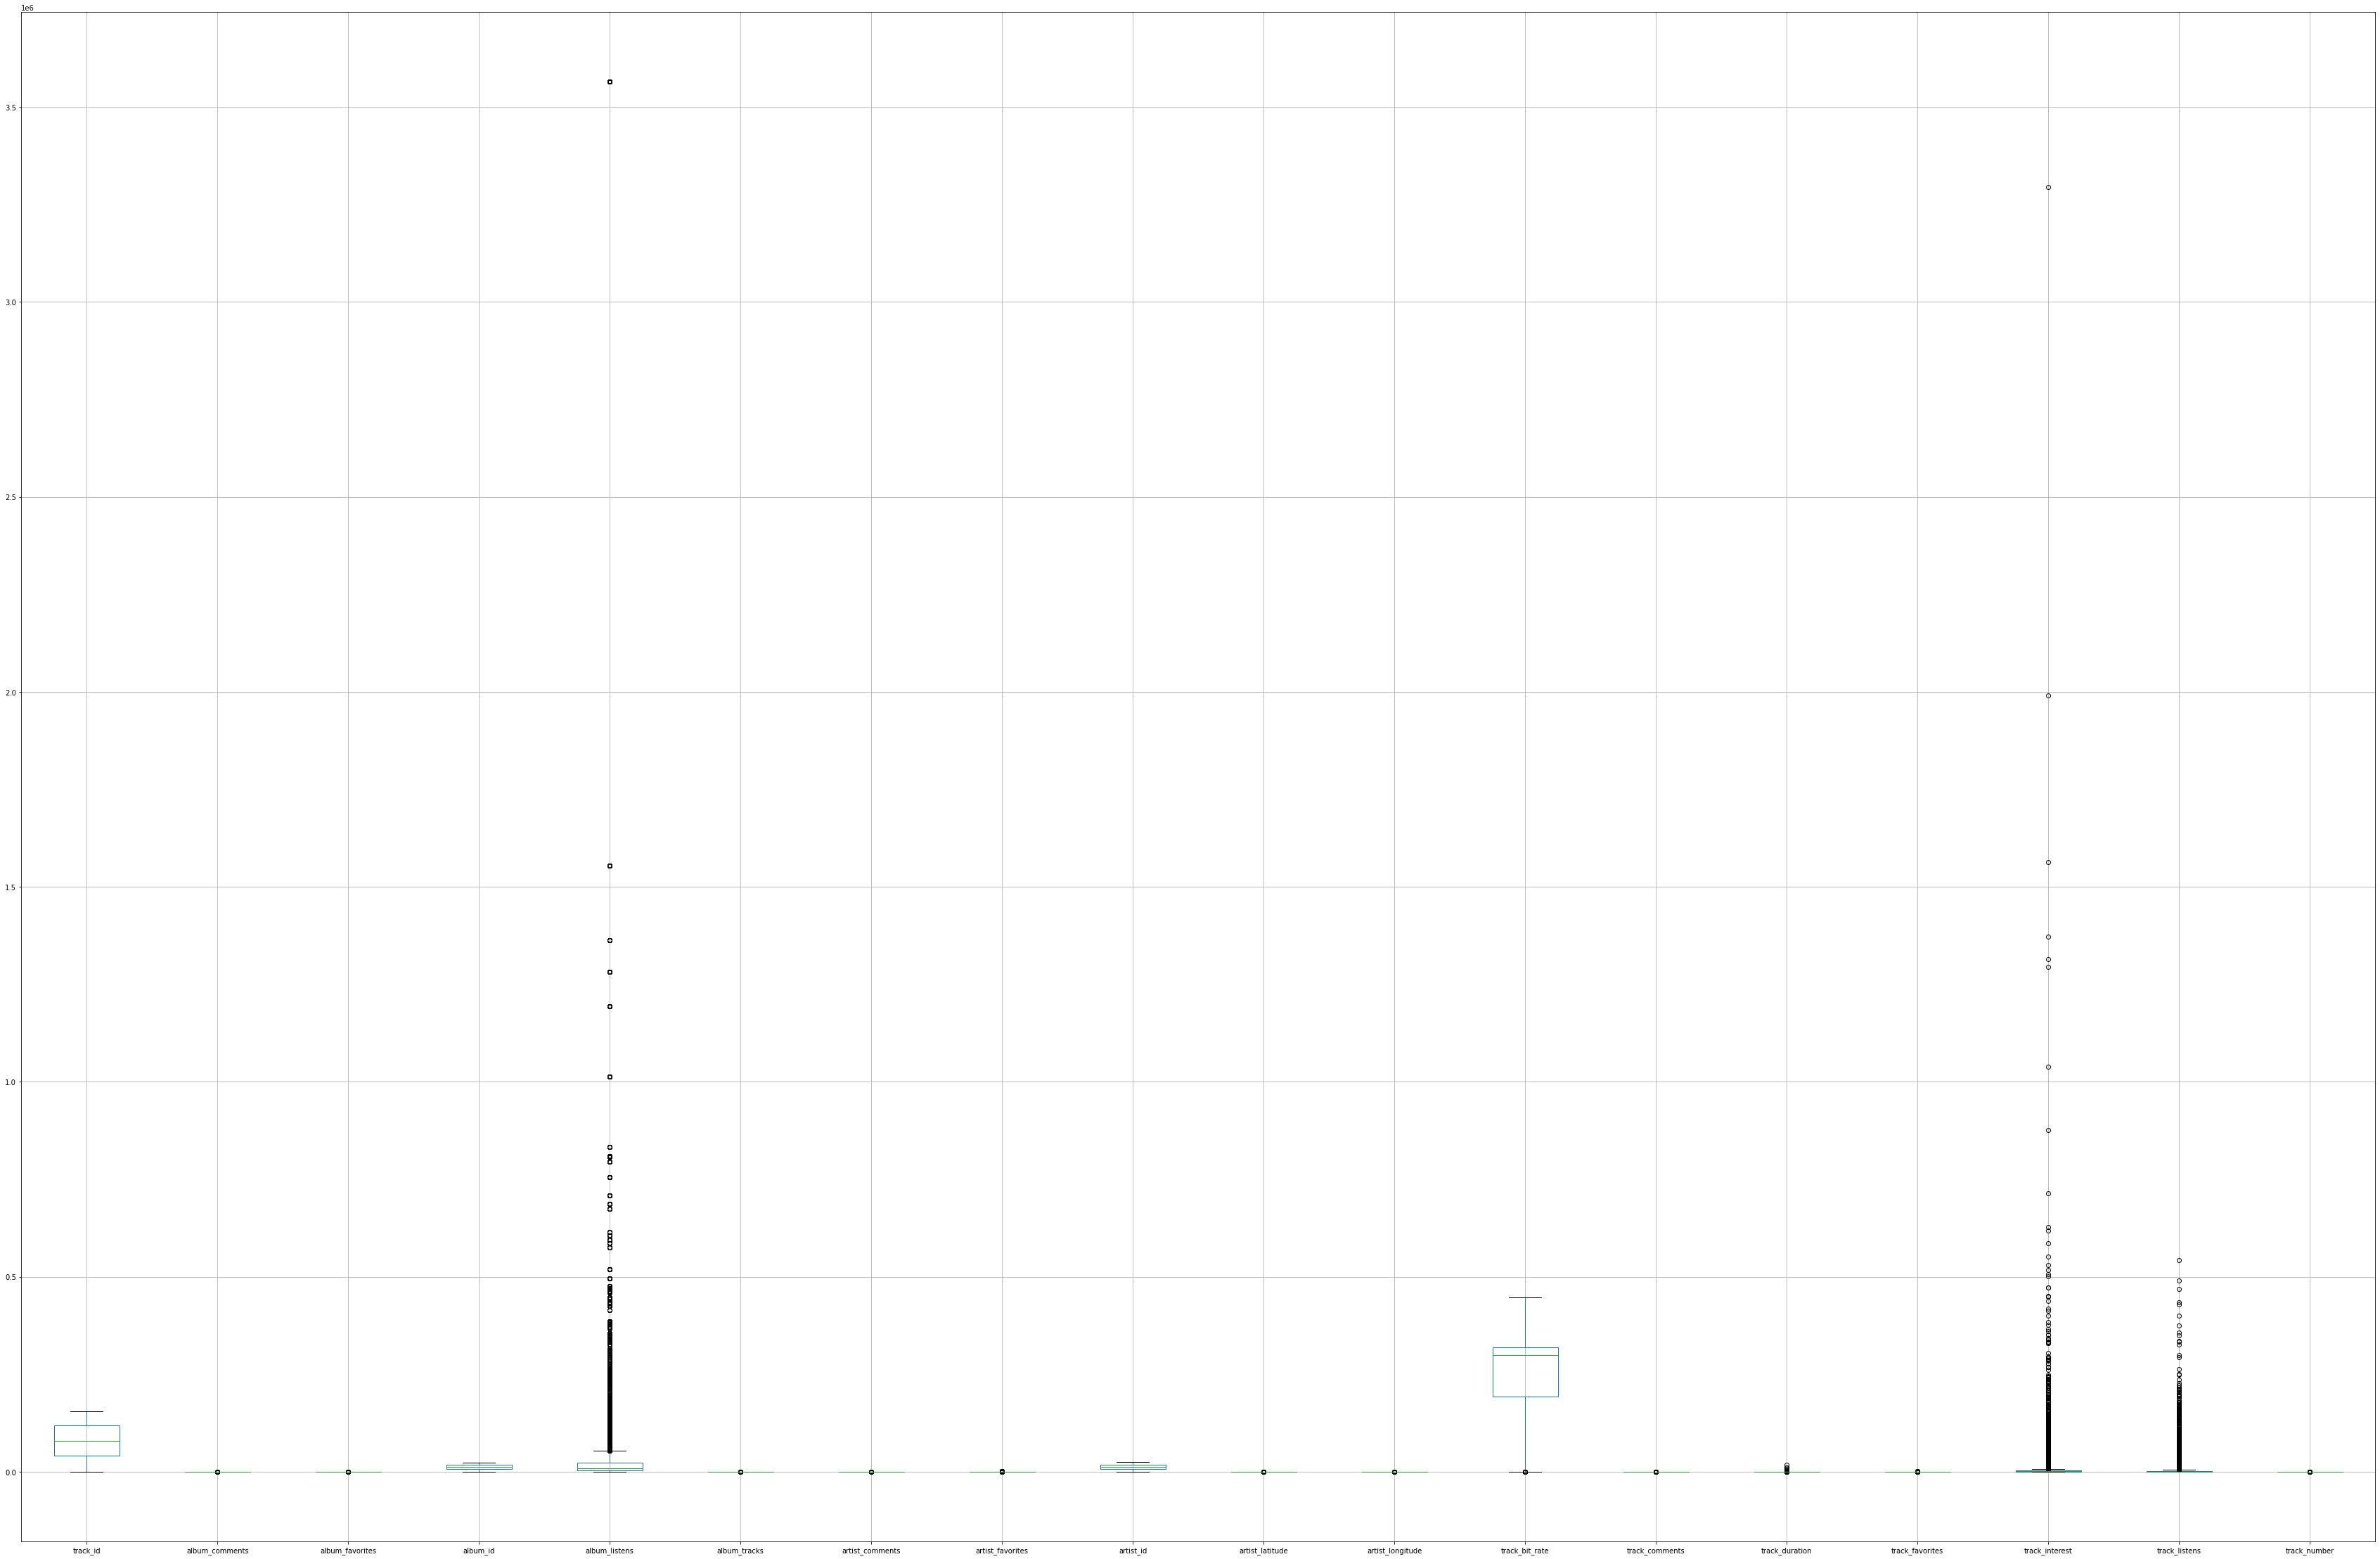

In [10]:
tracks.boxplot(figsize = [60,40]) #Display boxplots of attributes to visualize outliers

TypeError: Horizontal orientation requires numeric `x` variable.

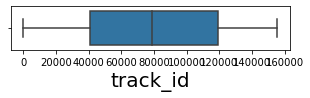

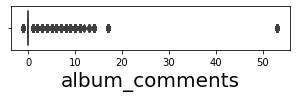

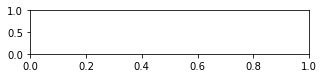

In [11]:
for column in tracks.columns:
    f,ax = plt.subplots(figsize=(5,0.8))
    ax = sns.boxplot(x=tracks[column])
    plt.xlabel(column, fontsize=20)

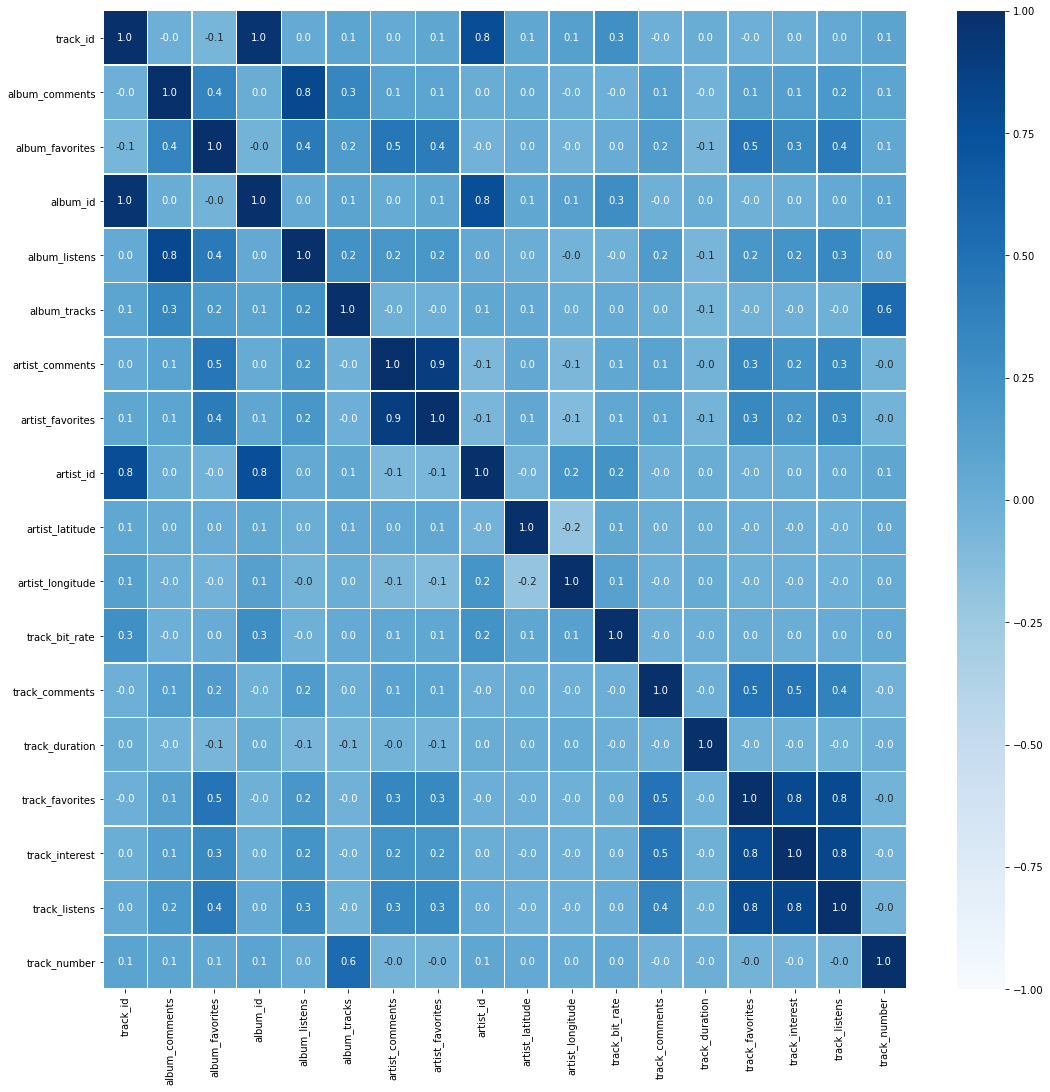

In [12]:
f,ax = plt.subplots(figsize=(18,18)) #Display a heatmap of the correlation matrix
sns.heatmap(tracks.corr(), annot=True, cmap="Blues", linewidths=0.5, linecolor="white", fmt=".1f", vmin=-1.0, vmax=1.0, ax=ax)
plt.show()
#f.savefig("correlation.png")

In [6]:
#Remove some redundant columns
columns2remove = ['album_information', 'artist_bio', 'artist_website',
                  'artist_wikipedia_page', 'track_information']

tracks.drop(columns2remove, inplace=True, axis=1)

tracks.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_listens,album_producer,album_tags,...,track_genres_all,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,6073,NaN,[],...,[21],4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,6073,NaN,[],...,[21],1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,6073,NaN,[],...,[21],1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,47632,NaN,[],...,[10],54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,2710,NaN,[],...,"[17, 10, 76, 103]",978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [7]:
tracks.shape

(106574, 48)

In [8]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   track_id                  106574 non-null  int64  
 1   album_comments            106574 non-null  int64  
 2   album_date_created        103045 non-null  object 
 3   album_date_released       70294 non-null   object 
 4   album_engineer            15295 non-null   object 
 5   album_favorites           106574 non-null  int64  
 6   album_id                  106574 non-null  int64  
 7   album_listens             106574 non-null  int64  
 8   album_producer            18060 non-null   object 
 9   album_tags                106574 non-null  object 
 10  album_title               105549 non-null  object 
 11  album_tracks              106574 non-null  int64  
 12  album_type                100066 non-null  object 
 13  artist_active_year_begin  22711 non-null   o

### Dealing with datetime attributes

In this section, the attributes 'album_date_created', 'album_date_released', 'artist_active_year_begin', 'artist_active_year_end', 'artist_date_created', 'track_date_created' and 'track_date_recorded' were parsed to datetime and converted to 4 new separated columns containing the year, month, day and daytime, respectively. For the 'artist_active_year_begin' and 'artist_active_year_end' attributes, only the year was kept since all the other values are the same.

In [9]:
pd.to_datetime(tracks['album_date_created']).iloc[0].year

2008

In [10]:
pd.to_datetime(tracks['album_date_created']).iloc[0].month

11

In [11]:
pd.to_datetime(tracks['album_date_created']).iloc[0].day

26

In [12]:
pd.to_datetime(tracks['album_date_created']).iloc[0].hour

1

In [13]:
pd.to_datetime(tracks['album_date_created']).iloc[0].minute

44

In [14]:
pd.to_datetime(tracks['album_date_created']).iloc[0].weekday()

2

In [15]:
#Parse the attribute 'album_date_created' to datetime
tracks['album_date_created'] = pd.to_datetime(tracks['album_date_created'])

#Get year, month, day and daytime from the attribute and create 4 new separated columns 
tracks['album_date_created_year'] = tracks['album_date_created'].dt.year
tracks['album_date_created_month'] = tracks['album_date_created'].dt.month
tracks['album_date_created_day'] = tracks['album_date_created'].dt.day

def daytime(h):
    if 6 <= h < 13:
        return 'morning'
    elif 13 <= h < 18:
        return 'afternoon'
    elif 18 <= h < 22:
        return 'evening'
    return 'night'

tracks['album_date_created_daytime'] = [daytime(d.hour) for d in pd.to_datetime(tracks['album_date_created'])]

tracks.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_listens,album_producer,album_tags,...,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title,album_date_created_year,album_date_created_month,album_date_created_day,album_date_created_daytime
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,6073,NaN,[],...,1293,NaN,3,NaN,[],Food,2008.0,11.0,26.0,night
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,6073,NaN,[],...,514,NaN,4,NaN,[],Electric Ave,2008.0,11.0,26.0,night
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,6073,NaN,[],...,1151,NaN,6,NaN,[],This World,2008.0,11.0,26.0,night
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,47632,NaN,[],...,50135,NaN,1,NaN,[],Freeway,2008.0,11.0,26.0,night
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,2710,NaN,[],...,361,NaN,3,NaN,[],Spiritual Level,2008.0,11.0,26.0,night


In [16]:
#Parse the attribute 'album_date_released' to datetime
tracks['album_date_released'] = pd.to_datetime(tracks['album_date_released'])

#Get year, month, day and daytime from the attribute and create 4 new separated columns 
tracks['album_date_released_year'] = tracks['album_date_released'].dt.year
tracks['album_date_released_month'] = tracks['album_date_released'].dt.month
tracks['album_date_released_day'] = tracks['album_date_released'].dt.day

tracks['album_date_released_daytime'] = [daytime(d.hour) for d in pd.to_datetime(tracks['album_date_released'])]

tracks.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_listens,album_producer,album_tags,...,track_tags,track_title,album_date_created_year,album_date_created_month,album_date_created_day,album_date_created_daytime,album_date_released_year,album_date_released_month,album_date_released_day,album_date_released_daytime
0,2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,6073,NaN,[],...,[],Food,2008.0,11.0,26.0,night,2009.0,1.0,5.0,night
1,3,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,6073,NaN,[],...,[],Electric Ave,2008.0,11.0,26.0,night,2009.0,1.0,5.0,night
2,5,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,6073,NaN,[],...,[],This World,2008.0,11.0,26.0,night,2009.0,1.0,5.0,night
3,10,0,2008-11-26 01:45:08,2008-02-06,NaN,4,6,47632,NaN,[],...,[],Freeway,2008.0,11.0,26.0,night,2008.0,2.0,6.0,night
4,20,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,2710,NaN,[],...,[],Spiritual Level,2008.0,11.0,26.0,night,2009.0,1.0,6.0,night


In [17]:
#Parse the attribute 'artist_active_year_begin' to datetime
tracks['artist_active_year_begin'] = pd.to_datetime(tracks['artist_active_year_begin'])

#Get only the year from the attribute and replace the column
tracks['artist_active_year_begin'] = tracks['artist_active_year_begin'].dt.year

tracks['artist_active_year_begin'].head()

0    2006.0
1    2006.0
2    2006.0
3       NaN
4    1990.0
Name: artist_active_year_begin, dtype: float64

In [18]:
#Parse the attribute 'artist_active_year_end' to datetime
tracks['artist_active_year_end'] = pd.to_datetime(tracks['artist_active_year_end'])

#Get only the year from the attribute and replace the column
tracks['artist_active_year_end'] = tracks['artist_active_year_end'].dt.year

tracks['artist_active_year_end'].head(10)

0       NaN
1       NaN
2       NaN
3       NaN
4    2011.0
5    2011.0
6    2011.0
7    2011.0
8    2011.0
9       NaN
Name: artist_active_year_end, dtype: float64

In [19]:
#Parse the attribute 'artist_date_created' to datetime
tracks['artist_date_created'] = pd.to_datetime(tracks['artist_date_created'])

#Get year, month, day and daytime from the attribute and create 4 new separated columns 
tracks['artist_date_created_year'] = tracks['artist_date_created'].dt.year
tracks['artist_date_created_month'] = tracks['artist_date_created'].dt.month
tracks['artist_date_created_day'] = tracks['artist_date_created'].dt.day

tracks['artist_date_created_daytime'] = [daytime(d.hour) for d in pd.to_datetime(tracks['artist_date_created'])]

tracks.head(10)

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_listens,album_producer,album_tags,...,album_date_created_day,album_date_created_daytime,album_date_released_year,album_date_released_month,album_date_released_day,album_date_released_daytime,artist_date_created_year,artist_date_created_month,artist_date_created_day,artist_date_created_daytime
0,2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,6073,NaN,[],...,26.0,night,2009.0,1.0,5.0,night,2008.0,11.0,26.0,night
1,3,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,6073,NaN,[],...,26.0,night,2009.0,1.0,5.0,night,2008.0,11.0,26.0,night
2,5,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,6073,NaN,[],...,26.0,night,2009.0,1.0,5.0,night,2008.0,11.0,26.0,night
3,10,0,2008-11-26 01:45:08,2008-02-06,NaN,4,6,47632,NaN,[],...,26.0,night,2008.0,2.0,6.0,night,2008.0,11.0,26.0,night
4,20,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,2710,NaN,[],...,26.0,night,2009.0,1.0,6.0,night,2008.0,11.0,26.0,night
5,26,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,2710,NaN,[],...,26.0,night,2009.0,1.0,6.0,night,2008.0,11.0,26.0,night
6,30,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,2710,NaN,[],...,26.0,night,2009.0,1.0,6.0,night,2008.0,11.0,26.0,night
7,46,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,2710,NaN,[],...,26.0,night,2009.0,1.0,6.0,night,2008.0,11.0,26.0,night
8,48,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,2710,NaN,[],...,26.0,night,2009.0,1.0,6.0,night,2008.0,11.0,26.0,night
9,134,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,6073,NaN,[],...,26.0,night,2009.0,1.0,5.0,night,2008.0,11.0,26.0,night


In [20]:
#Parse the attribute 'track_date_created' to datetime
tracks['track_date_created'] = pd.to_datetime(tracks['track_date_created'])

#Get year, month, day and daytime from the attribute and create 4 new separated columns 
tracks['track_date_created_year'] = tracks['track_date_created'].dt.year
tracks['track_date_created_month'] = tracks['track_date_created'].dt.month
tracks['track_date_created_day'] = tracks['track_date_created'].dt.day

tracks['track_date_created_daytime'] = [daytime(d.hour) for d in pd.to_datetime(tracks['track_date_created'])]

tracks.head(10)

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_listens,album_producer,album_tags,...,album_date_released_day,album_date_released_daytime,artist_date_created_year,artist_date_created_month,artist_date_created_day,artist_date_created_daytime,track_date_created_year,track_date_created_month,track_date_created_day,track_date_created_daytime
0,2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,6073,NaN,[],...,5.0,night,2008.0,11.0,26.0,night,2008,11,26,night
1,3,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,6073,NaN,[],...,5.0,night,2008.0,11.0,26.0,night,2008,11,26,night
2,5,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,6073,NaN,[],...,5.0,night,2008.0,11.0,26.0,night,2008,11,26,night
3,10,0,2008-11-26 01:45:08,2008-02-06,NaN,4,6,47632,NaN,[],...,6.0,night,2008.0,11.0,26.0,night,2008,11,25,afternoon
4,20,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,2710,NaN,[],...,6.0,night,2008.0,11.0,26.0,night,2008,11,26,night
5,26,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,2710,NaN,[],...,6.0,night,2008.0,11.0,26.0,night,2008,11,26,night
6,30,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,2710,NaN,[],...,6.0,night,2008.0,11.0,26.0,night,2008,11,26,night
7,46,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,2710,NaN,[],...,6.0,night,2008.0,11.0,26.0,night,2008,11,26,night
8,48,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,2710,NaN,[],...,6.0,night,2008.0,11.0,26.0,night,2008,11,26,night
9,134,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,6073,NaN,[],...,5.0,night,2008.0,11.0,26.0,night,2008,11,26,night


In [21]:
#Parse the attribute 'track_date_recorded' to datetime
tracks['track_date_recorded'] = pd.to_datetime(tracks['track_date_recorded'])

#Get year, month, day and daytime from the attribute and create 4 new separated columns 
tracks['track_date_recorded_year'] = tracks['track_date_recorded'].dt.year
tracks['track_date_recorded_month'] = tracks['track_date_recorded'].dt.month
tracks['track_date_recorded_day'] = tracks['track_date_recorded'].dt.day

tracks['track_date_recorded_daytime'] = [daytime(d.hour) for d in pd.to_datetime(tracks['track_date_recorded'])]

tracks.head(10)

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_listens,album_producer,album_tags,...,artist_date_created_day,artist_date_created_daytime,track_date_created_year,track_date_created_month,track_date_created_day,track_date_created_daytime,track_date_recorded_year,track_date_recorded_month,track_date_recorded_day,track_date_recorded_daytime
0,2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,6073,NaN,[],...,26.0,night,2008,11,26,night,2008.0,11.0,26.0,night
1,3,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,6073,NaN,[],...,26.0,night,2008,11,26,night,2008.0,11.0,26.0,night
2,5,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,6073,NaN,[],...,26.0,night,2008,11,26,night,2008.0,11.0,26.0,night
3,10,0,2008-11-26 01:45:08,2008-02-06,NaN,4,6,47632,NaN,[],...,26.0,night,2008,11,25,afternoon,2008.0,11.0,26.0,night
4,20,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,2710,NaN,[],...,26.0,night,2008,11,26,night,2008.0,1.0,1.0,night
5,26,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,2710,NaN,[],...,26.0,night,2008,11,26,night,2008.0,1.0,1.0,night
6,30,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,2710,NaN,[],...,26.0,night,2008,11,26,night,2008.0,1.0,1.0,night
7,46,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,2710,NaN,[],...,26.0,night,2008,11,26,night,2008.0,1.0,1.0,night
8,48,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,2710,NaN,[],...,26.0,night,2008,11,26,night,2008.0,1.0,1.0,night
9,134,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,6073,NaN,[],...,26.0,night,2008,11,26,night,2008.0,11.0,26.0,night


In [22]:
#Remove the original datetime attributes

dtattributes2remove = ['album_date_created', 'album_date_released', 'artist_active_year_begin', 
                      'artist_active_year_end', 'artist_date_created', 'track_date_created', 
                      'track_date_recorded']

tracks.drop(dtattributes2remove, inplace=True, axis=1)

tracks.head()

,track_id,album_comments,album_engineer,album_favorites,album_id,album_listens,album_producer,album_tags,album_title,album_tracks,...,artist_date_created_day,artist_date_created_daytime,track_date_created_year,track_date_created_month,track_date_created_day,track_date_created_daytime,track_date_recorded_year,track_date_recorded_month,track_date_recorded_day,track_date_recorded_daytime
0,2,0,NaN,4,1,6073,NaN,[],AWOL - A Way Of Life,7,...,26.0,night,2008,11,26,night,2008.0,11.0,26.0,night
1,3,0,NaN,4,1,6073,NaN,[],AWOL - A Way Of Life,7,...,26.0,night,2008,11,26,night,2008.0,11.0,26.0,night
2,5,0,NaN,4,1,6073,NaN,[],AWOL - A Way Of Life,7,...,26.0,night,2008,11,26,night,2008.0,11.0,26.0,night
3,10,0,NaN,4,6,47632,NaN,[],Constant Hitmaker,2,...,26.0,night,2008,11,25,afternoon,2008.0,11.0,26.0,night
4,20,0,NaN,2,4,2710,NaN,[],Niris,13,...,26.0,night,2008,11,26,night,2008.0,1.0,1.0,night


### Remove redundant columns or those with lots of missing values

In [24]:
# Test FOR NOW WE CHOOSE THIS ONE IN ORDER TO REPLACE THE MISSING VALUES IN THE REMAINING COLUMNS
# Remove redundant columns or with lots of missing values

features2remove = ['album_engineer', 'album_producer', 'album_tags', 'album_title', 'artist_associated_labels',
                   'artist_latitude', 'artist_longitude', 'artist_members', 'artist_related_projects',
                   'artist_associated_labels', 'set_split', 'set_subset', 'track_composer', 'track_genre_top',
                   'track_language_code', 'track_lyricist', 'track_publisher', 'track_date_recorded_year',
                   'track_date_recorded_month', 'track_date_recorded_day']

In [25]:
tracks.drop(features2remove, inplace=True, axis=1)

tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   track_id                     106574 non-null  int64  
 1   album_comments               106574 non-null  int64  
 2   album_favorites              106574 non-null  int64  
 3   album_id                     106574 non-null  int64  
 4   album_listens                106574 non-null  int64  
 5   album_tracks                 106574 non-null  int64  
 6   album_type                   100066 non-null  object 
 7   artist_comments              106574 non-null  int64  
 8   artist_favorites             106574 non-null  int64  
 9   artist_id                    106574 non-null  int64  
 10  artist_location              70210 non-null   object 
 11  artist_name                  106574 non-null  object 
 12  artist_tags                  106574 non-null  object 
 13 

### Handling missing values

In [26]:
tracks.isna() #Return a table with missing values

,track_id,album_comments,album_favorites,album_id,album_listens,album_tracks,album_type,artist_comments,artist_favorites,artist_id,...,album_date_released_daytime,artist_date_created_year,artist_date_created_month,artist_date_created_day,artist_date_created_daytime,track_date_created_year,track_date_created_month,track_date_created_day,track_date_created_daytime,track_date_recorded_daytime
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
106570,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
106571,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
106572,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
tracks.isna().sum()

track_id                           0
album_comments                     0
album_favorites                    0
album_id                           0
album_listens                      0
album_tracks                       0
album_type                      6508
artist_comments                    0
artist_favorites                   0
artist_id                          0
artist_location                36364
artist_name                        0
artist_tags                        0
track_bit_rate                     0
track_comments                     0
track_duration                     0
track_favorites                    0
track_genres                       0
track_genres_all                   0
track_interest                     0
track_license                     87
track_listens                      0
track_number                       0
track_tags                         0
track_title                        1
album_date_created_year         3529
album_date_created_month        3529
a

In [29]:
#Replace missing values in album_type feature with the mode value
tracks['album_type'] = tracks['album_type'].fillna(tracks['album_type'].mode()[0])

#Replace missing values in artist_location feature with the mode value
tracks['artist_location'] = tracks['artist_location'].fillna(tracks['artist_location'].mode()[0])

#Replace missing values in album_date_created_year feature with the mode value
tracks['album_date_created_year'] = tracks['album_date_created_year'].fillna(tracks['album_date_created_year'].mode()[0])

#Replace missing values in album_date_created_month feature with the mode value
tracks['album_date_created_month'] = tracks['album_date_created_month'].fillna(tracks['album_date_created_month'].mode()[0])

#Replace missing values in album_date_created_day feature with the mode value
tracks['album_date_created_day'] = tracks['album_date_created_day'].fillna(tracks['album_date_created_day'].mode()[0])

#Replace missing values in album_date_released_year feature with the mode value
tracks['album_date_released_year'] = tracks['album_date_released_year'].fillna(tracks['album_date_released_year'].mode()[0])

#Replace missing values in album_date_released_month feature with the mode value
tracks['album_date_released_month'] = tracks['album_date_released_month'].fillna(tracks['album_date_released_month'].mode()[0])

#Replace missing values in album_date_released_day feature with the mode value
tracks['album_date_released_day'] = tracks['album_date_released_day'].fillna(tracks['album_date_released_day'].mode()[0])

#Replace missing values in album_date_released_year feature with the mode value
tracks['artist_date_created_year'] = tracks['artist_date_created_year'].fillna(tracks['artist_date_created_year'].mode()[0])

#Replace missing values in artist_date_created_month feature with the mode value
tracks['artist_date_created_month'] = tracks['artist_date_created_month'].fillna(tracks['artist_date_created_month'].mode()[0])

#Replace missing values in artist_date_created_day feature with the mode value
tracks['artist_date_created_day'] = tracks['artist_date_created_day'].fillna(tracks['artist_date_created_day'].mode()[0])

In [30]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   track_id                     106574 non-null  int64  
 1   album_comments               106574 non-null  int64  
 2   album_favorites              106574 non-null  int64  
 3   album_id                     106574 non-null  int64  
 4   album_listens                106574 non-null  int64  
 5   album_tracks                 106574 non-null  int64  
 6   album_type                   106574 non-null  object 
 7   artist_comments              106574 non-null  int64  
 8   artist_favorites             106574 non-null  int64  
 9   artist_id                    106574 non-null  int64  
 10  artist_location              106574 non-null  object 
 11  artist_name                  106574 non-null  object 
 12  artist_tags                  106574 non-null  object 
 13 

In [31]:
# Drop any row that contains missing values (87 from track_license and 1 from track_title)

tracks.dropna(inplace=True)

In [32]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106486 entries, 0 to 106573
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   track_id                     106486 non-null  int64  
 1   album_comments               106486 non-null  int64  
 2   album_favorites              106486 non-null  int64  
 3   album_id                     106486 non-null  int64  
 4   album_listens                106486 non-null  int64  
 5   album_tracks                 106486 non-null  int64  
 6   album_type                   106486 non-null  object 
 7   artist_comments              106486 non-null  int64  
 8   artist_favorites             106486 non-null  int64  
 9   artist_id                    106486 non-null  int64  
 10  artist_location              106486 non-null  object 
 11  artist_name                  106486 non-null  object 
 12  artist_tags                  106486 non-null  object 
 13 

### Transformation of the 'track_license' attribute

In [33]:
tracks['track_license'].value_counts()

Attribution-Noncommercial-Share Alike 3.0 United States                          19250
Attribution-NonCommercial-NoDerivatives (aka Music Sharing) 3.0 International    17732
Attribution-NonCommercial-ShareAlike 3.0 International                           15260
Creative Commons Attribution-NonCommercial-NoDerivatives 4.0                     12133
Attribution-Noncommercial-No Derivative Works 3.0 United States                  10583
                                                                                 ...  
Attribution-Noncommercial-NoDerivatives 2.0 Belgium                                  1
Attribution 2.5 Canada                                                               1
Attribution-NonCommercial-NoDerivs 3.0 Poland                                        1
Attribution-Noncommercial-No Derivative Works 2.5 Portugal                           1
Attribution-Noncommercial 2.5 Brazil                                                 1
Name: track_license, Length: 113, dtype: in

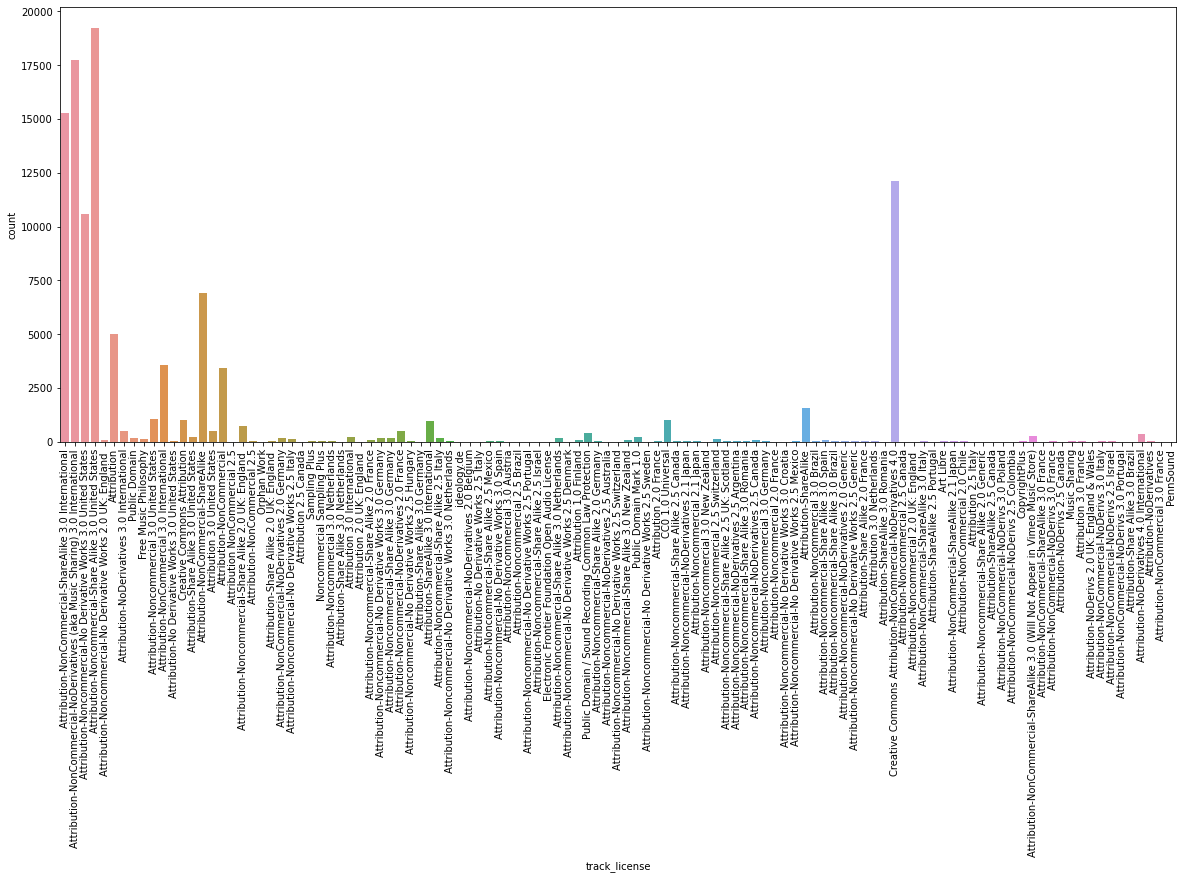

In [36]:
# Variable distribution

plt.subplots(figsize=(20,8))

sns.countplot(x='track_license', data=tracks)
plt.xticks(rotation=90)
plt.show()

The target variable to predict is whether a track has a 'Attribution-NonCommercial-ShareAlike 3.0 International' license or not. So we need to transform the 'track_license' attribute into a binary attribute.

In [34]:
values2modify = list(tracks['track_license'].unique())
values2modify.remove('Attribution-NonCommercial-ShareAlike 3.0 International')

In [35]:
tracks['Attribution-NonCommercial-ShareAlike 3.0 International'] = tracks['track_license']

class_name = 'Attribution-NonCommercial-ShareAlike 3.0 International'

tracks[class_name] = tracks[class_name].replace(class_name, 1)

for value in values2modify:
        tracks[class_name] = tracks[class_name].replace(value, 0)

tracks.head(10)

,track_id,album_comments,album_favorites,album_id,album_listens,album_tracks,album_type,artist_comments,artist_favorites,artist_id,...,artist_date_created_year,artist_date_created_month,artist_date_created_day,artist_date_created_daytime,track_date_created_year,track_date_created_month,track_date_created_day,track_date_created_daytime,track_date_recorded_daytime,Attribution-NonCommercial-ShareAlike 3.0 International
0,2,0,4,1,6073,7,Album,0,9,1,...,2008.0,11.0,26.0,night,2008,11,26,night,night,1
1,3,0,4,1,6073,7,Album,0,9,1,...,2008.0,11.0,26.0,night,2008,11,26,night,night,1
2,5,0,4,1,6073,7,Album,0,9,1,...,2008.0,11.0,26.0,night,2008,11,26,night,night,1
3,10,0,4,6,47632,2,Album,3,74,6,...,2008.0,11.0,26.0,night,2008,11,25,afternoon,night,0
4,20,0,2,4,2710,13,Album,2,10,4,...,2008.0,11.0,26.0,night,2008,11,26,night,night,0
5,26,0,2,4,2710,13,Album,2,10,4,...,2008.0,11.0,26.0,night,2008,11,26,night,night,0
6,30,0,2,4,2710,13,Album,2,10,4,...,2008.0,11.0,26.0,night,2008,11,26,night,night,0
7,46,0,2,4,2710,13,Album,2,10,4,...,2008.0,11.0,26.0,night,2008,11,26,night,night,0
8,48,0,2,4,2710,13,Album,2,10,4,...,2008.0,11.0,26.0,night,2008,11,26,night,night,0
9,134,0,4,1,6073,7,Album,0,9,1,...,2008.0,11.0,26.0,night,2008,11,26,night,night,1


In [36]:
tracks[class_name].value_counts()

0    91226
1    15260
Name: Attribution-NonCommercial-ShareAlike 3.0 International, dtype: int64

In [37]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106486 entries, 0 to 106573
Data columns (total 43 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   track_id                                                106486 non-null  int64  
 1   album_comments                                          106486 non-null  int64  
 2   album_favorites                                         106486 non-null  int64  
 3   album_id                                                106486 non-null  int64  
 4   album_listens                                           106486 non-null  int64  
 5   album_tracks                                            106486 non-null  int64  
 6   album_type                                              106486 non-null  object 
 7   artist_comments                                         106486 non-null  int64  
 8   artist_favorites        

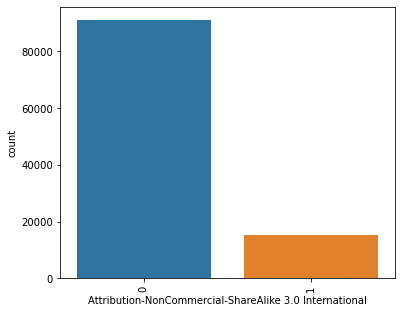

In [38]:
# New variable distribution

plt.subplots(figsize=(6,5))

sns.countplot(x=class_name, data=tracks)
plt.xticks(rotation=90)
plt.show()

In [39]:
# Drop the 'track_license' attribute

tracks.drop('track_license', axis=1, inplace=True)

tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106486 entries, 0 to 106573
Data columns (total 42 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   track_id                                                106486 non-null  int64  
 1   album_comments                                          106486 non-null  int64  
 2   album_favorites                                         106486 non-null  int64  
 3   album_id                                                106486 non-null  int64  
 4   album_listens                                           106486 non-null  int64  
 5   album_tracks                                            106486 non-null  int64  
 6   album_type                                              106486 non-null  object 
 7   artist_comments                                         106486 non-null  int64  
 8   artist_favorites        

### Label Encoding

Columns to encode: 'album_type', 'artist_location', 'artist_name', 'artist_tags', 'track_genres', 'track_genres_all', 'track_tags', 'track_title', 'album_date_created_daytime', 'album_date_released_daytime', 'artist_date_created_daytime', 'track_date_created_daytime', 'track_date_recorded_daytime'.

In [40]:
#Transform categorical features into numerical features using label encoding
from sklearn.preprocessing import LabelEncoder #LabelEncoder is imported and used to transform the features

label_encoder = LabelEncoder()

features2encode = ['album_type', 'artist_location', 'artist_name', 'artist_tags', 'track_genres',
                   'track_genres_all', 'track_tags', 'track_title', 'album_date_created_daytime',
                   'album_date_released_daytime', 'artist_date_created_daytime', 'track_date_created_daytime',
                   'track_date_recorded_daytime']
        
for feature in features2encode: #Transformation applied for each categorical attribute in df
    tracks[feature] = label_encoder.fit_transform(tracks[feature])

In [41]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106486 entries, 0 to 106573
Data columns (total 42 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   track_id                                                106486 non-null  int64  
 1   album_comments                                          106486 non-null  int64  
 2   album_favorites                                         106486 non-null  int64  
 3   album_id                                                106486 non-null  int64  
 4   album_listens                                           106486 non-null  int64  
 5   album_tracks                                            106486 non-null  int64  
 6   album_type                                              106486 non-null  int64  
 7   artist_comments                                         106486 non-null  int64  
 8   artist_favorites        

### One-hot Encoding (Probably no need to use it)

In [30]:
tracks = pd.get_dummies(tracks[[c for c in tracks.columns]], prefix_sep='=')
tracks.head()

,track_id,album_comments,album_favorites,album_id,album_listens,album_tracks,artist_comments,artist_favorites,artist_id,track_bit_rate,...,album_date_released_daytime=night,artist_date_created_daytime=afternoon,artist_date_created_daytime=evening,artist_date_created_daytime=morning,artist_date_created_daytime=night,track_date_created_daytime=afternoon,track_date_created_daytime=evening,track_date_created_daytime=morning,track_date_created_daytime=night,track_date_recorded_daytime=night
0,2,0,4,1,6073,7,0,9,1,256000,...,1,0,0,0,1,0,0,0,1,1
1,3,0,4,1,6073,7,0,9,1,256000,...,1,0,0,0,1,0,0,0,1,1
2,5,0,4,1,6073,7,0,9,1,256000,...,1,0,0,0,1,0,0,0,1,1
3,10,0,4,6,47632,2,3,74,6,192000,...,1,0,0,0,1,1,0,0,0,1
4,20,0,2,4,2710,13,2,10,4,256000,...,1,0,0,0,1,0,0,0,1,1


In [31]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 33 columns):
 #   Column                                 Non-Null Count   Dtype
---  ------                                 --------------   -----
 0   track_id                               106574 non-null  int64
 1   album_comments                         106574 non-null  int64
 2   album_favorites                        106574 non-null  int64
 3   album_id                               106574 non-null  int64
 4   album_listens                          106574 non-null  int64
 5   album_tracks                           106574 non-null  int64
 6   artist_comments                        106574 non-null  int64
 7   artist_favorites                       106574 non-null  int64
 8   artist_id                              106574 non-null  int64
 9   track_bit_rate                         106574 non-null  int64
 10  track_comments                         106574 non-null  int64
 11  track_duratio

Save pre-processed dataset

In [42]:
tracks.to_csv(r'data/fma_metadata/tracks_processed_filled.csv')